In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",100)
import warnings
warnings.simplefilter('ignore')

### Data overview

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two - months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment in June, 2005 (1=yes, 0=no)

### Read data

In [6]:
filepath = 'data.xls'
data = pd.read_excel(filepath,header=1)
data.columns = data.columns.str.lower()

In [3]:
data.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.rename(columns={'default payment next month':'default'}, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id           30000 non-null int64
limit_bal    30000 non-null int64
sex          30000 non-null int64
education    30000 non-null int64
marriage     30000 non-null int64
age          30000 non-null int64
pay_0        30000 non-null int64
pay_2        30000 non-null int64
pay_3        30000 non-null int64
pay_4        30000 non-null int64
pay_5        30000 non-null int64
pay_6        30000 non-null int64
bill_amt1    30000 non-null int64
bill_amt2    30000 non-null int64
bill_amt3    30000 non-null int64
bill_amt4    30000 non-null int64
bill_amt5    30000 non-null int64
bill_amt6    30000 non-null int64
pay_amt1     30000 non-null int64
pay_amt2     30000 non-null int64
pay_amt3     30000 non-null int64
pay_amt4     30000 non-null int64
pay_amt5     30000 non-null int64
pay_amt6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [19]:
g_default = data.groupby('default').size().reset_index()
g_default.columns = ['default','count']

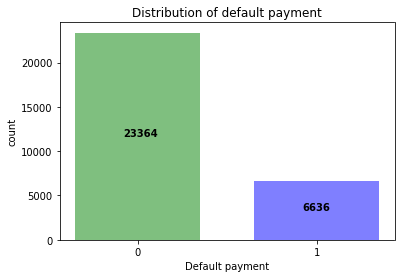

In [20]:
fig , ax = plt.subplots()
ax.bar(g_default['default'],g_default['count'],width=0.7,color=['g','b'],alpha=0.5)
ax.set_title('Distribution of default payment')
ax.set_xticks([0,1])
ax.set_xlabel('Default payment')
ax.set_ylabel('count')
for i, v in enumerate(g_default['count']):
    ax.text( i -.08,v/2, str(v), color='black', fontweight='bold')

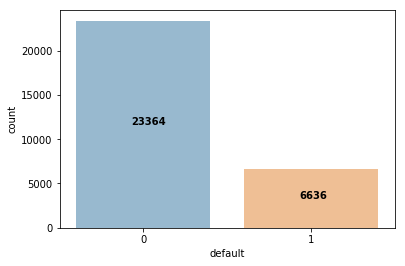

In [21]:
ax = sns.countplot(x='default',data=data,alpha=0.5)
for i, v in enumerate(g_default['count']):
    ax.text( i -.07,v/2, str(v), color='black', fontweight='bold')

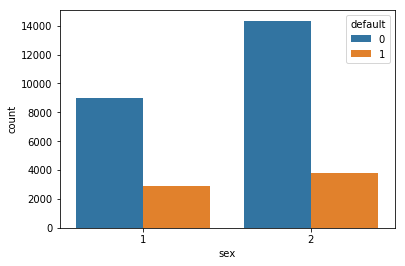

In [22]:
ax = sns.countplot(x='sex',hue='default',data=data)

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task1

### 1- Bar plot count of each education level per class. 
    
### 2- Bar plot count of each marriage level per class.

</div>

<div class='alert alert-block alert-warning' style='font-size:150%'>
    
### Histogram

</div>

### Histogram of age with matplotlib

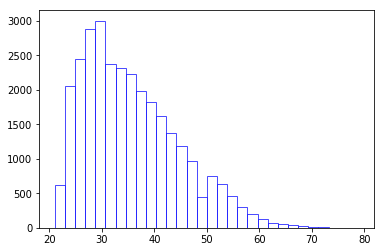

In [12]:
fig,ax = plt.subplots()
n, bins, patches = plt.hist(data['age'],bins=30,facecolor='w',edgecolor='b',alpha=0.7,density=0)

### Histogram of age with seaborn

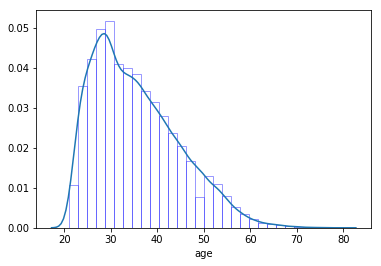

In [13]:
sns.distplot(data['age'],bins=30,hist_kws={"edgecolor": 'b',"facecolor":'w'})

### Histogram of age for each class on same figure

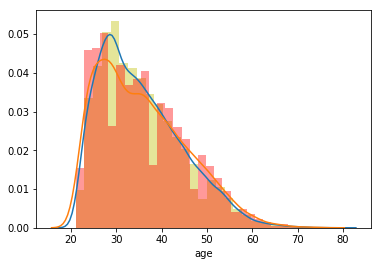

In [14]:
fig,ax = plt.subplots()
sns.distplot(data[data['default']==0]['age'],bins=30,hist_kws={"facecolor":'y'})
sns.distplot(data[data['default']==1]['age'],bins=30,hist_kws={"facecolor":'r'})

### Histogram of age for each class on separate axes

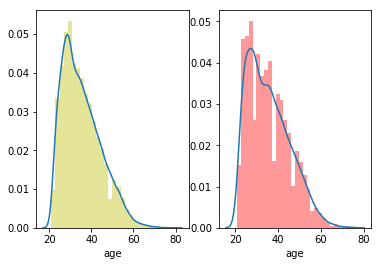

In [15]:
fig, axs = plt.subplots(nrows=1,ncols=2)
sns.distplot(data[data['default']==0]['age'],bins=30,hist_kws={"facecolor":'y'},ax=axs[0])
sns.distplot(data[data['default']==1]['age'],bins=30,hist_kws={"facecolor":'r'},ax=axs[1])

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task2

### Plot the histogram of education for each class on separate axes

Hint: There are 7 categoricatl levels for education. Use a subplots of size (2,4) and inside a for loop plot the histograms.

</div>

<div class='alert alert-block alert-warning' style='font-size:150%'>

### Scatter Plot



</div>

### Matplotlib: Scatter plot of "bill_amt6" vs "pay_amt5"

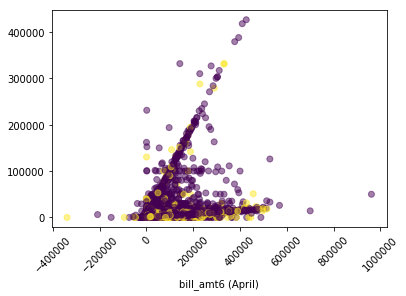

In [16]:
fig, ax = plt.subplots()
ax.scatter(data['bill_amt6'],data['pay_amt5'],c=data['default'],alpha=0.5)
ax.set_xlabel('bill_amt6 (April)')
ax.tick_params(axis='x',rotation=45)

### Seaborn: Scatter plot of "bill_amt6" vs "pay_amt5"

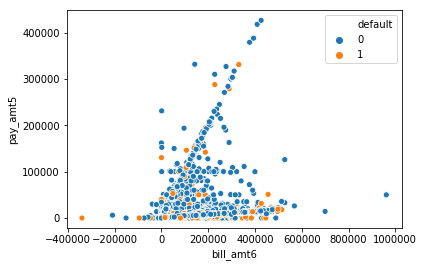

In [17]:
sns.scatterplot(x='bill_amt6',y='pay_amt5',hue='default',data=data)

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task3

### In a foor loop plot the scatter for bill and pay for other months


</div>

<div class='alert alert-block alert-warning' style='font-size:150%'>

### Pair Plot

Using bar plot to illusterate the number of default payment in each class.

</div>

In [18]:
bill_cols = [col for col in data.columns if 'bill' in col]

/Users/peymas/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/peymas/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


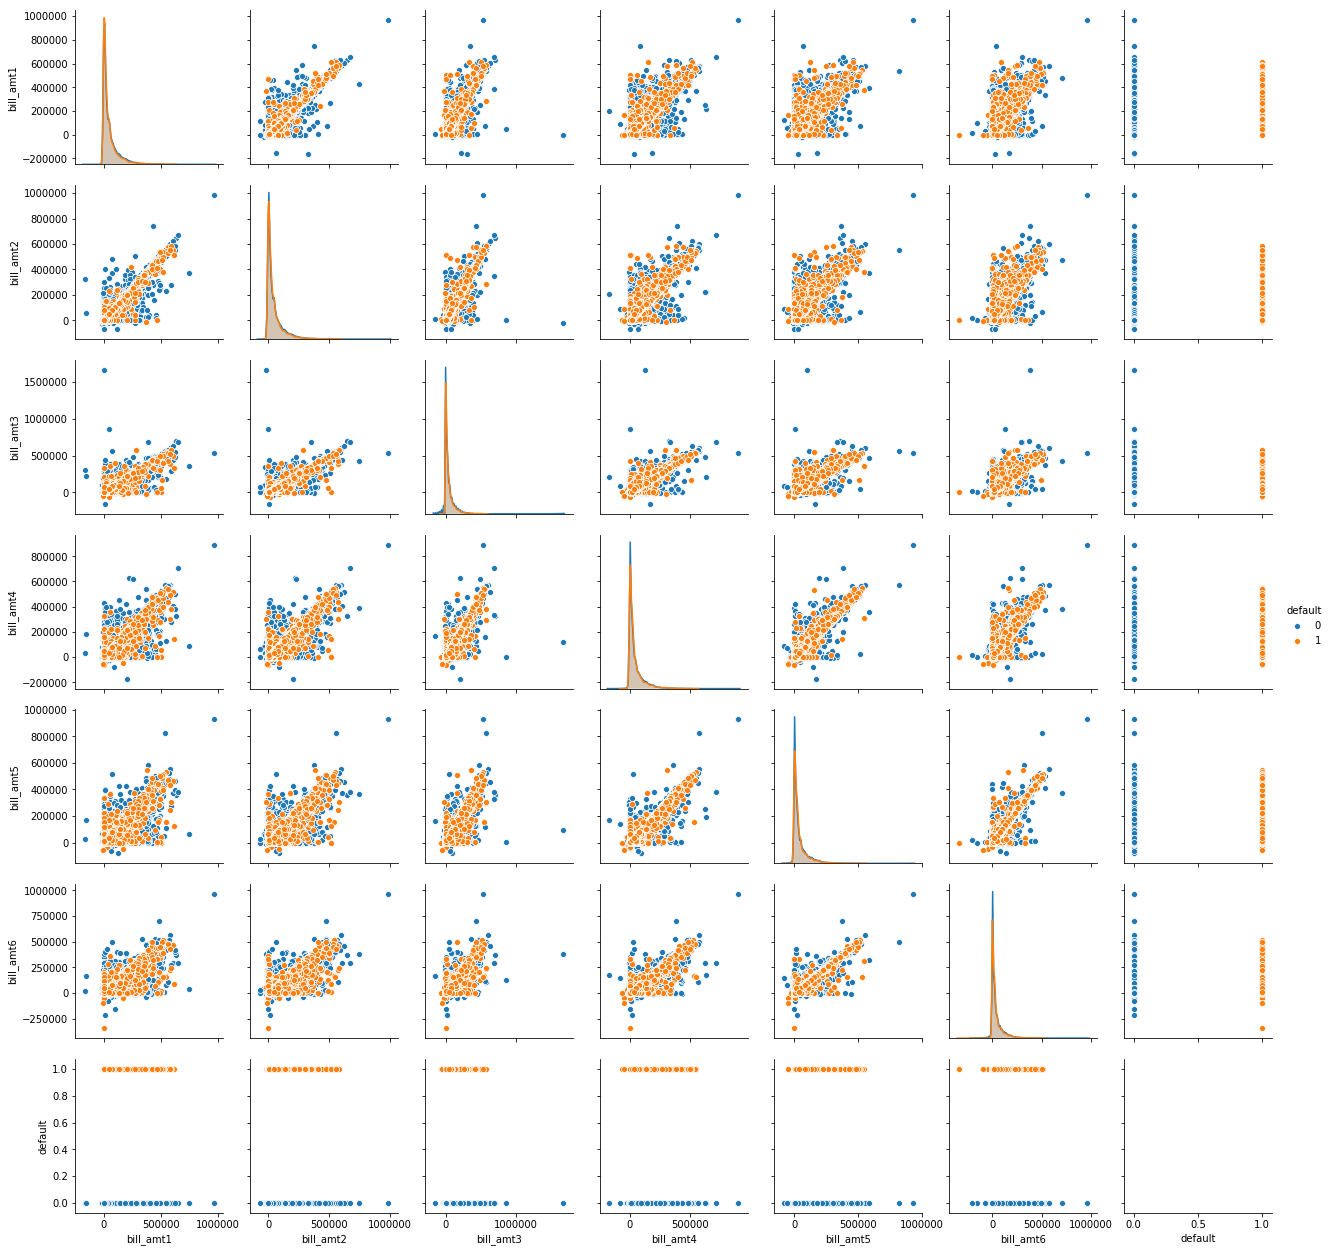

In [19]:
sns.pairplot(data[bill_cols+['default']],hue='default')

<div class='alert alert-block alert-warning' style='font-size:150%'>

### Box plot


</div>

### Box plot of age feature

Text(0.5, 1.0, 'Box plot for age feature')

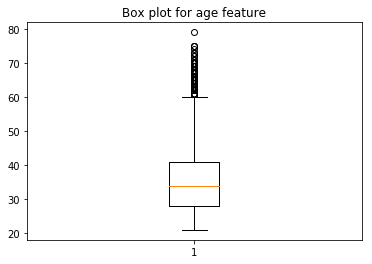

In [20]:
fig, ax = plt.subplots()
ax.boxplot(data['age'])
ax.set_title('Box plot for age feature')

In [21]:
### Box plot of limit_bal feature

Text(0.5, 1.0, 'Box plot for limit_bal feature')

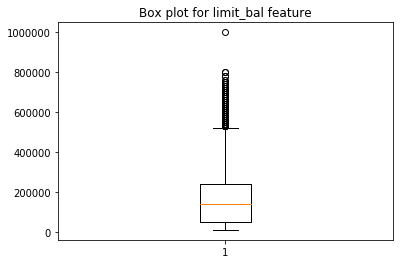

In [22]:
fig, ax = plt.subplots()
ax.boxplot(data['limit_bal'])
ax.set_title('Box plot for limit_bal feature')

### Grouped boxplot

In [23]:
data['bill6_pay5'] = data['bill_amt6'] - data['pay_amt5']

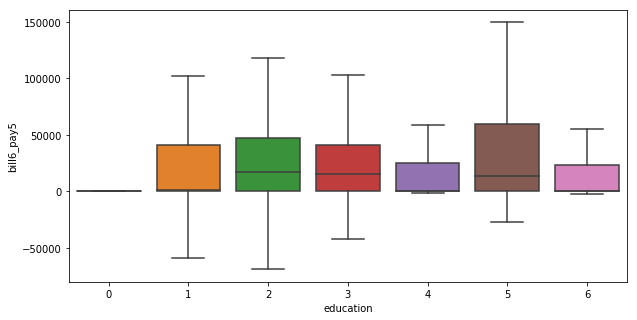

In [24]:
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='education',y='bill6_pay5',data=data,showfliers=False)

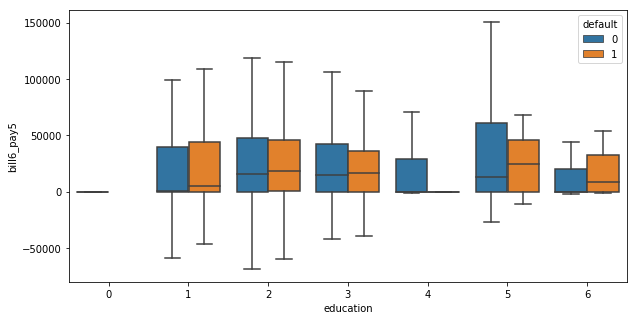

In [25]:
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='education',y='bill6_pay5',data=data,showfliers=False,hue='default')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task3

### 1- Plot boxplot for 'default' and 'bill_mnt' for all months

### 2- Plot boxplot for 'default' and difference between 'bill_mnt_n' and 'pay_mnt_(n-1)' for all months

</div>

<div class='alert alert-block alert-warning' style='font-size:150%'>

### Violin plot


</div>

### Seaborn: Violinplot of 'age' feature

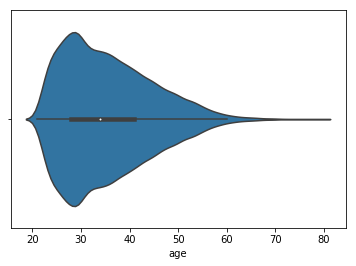

In [26]:
sns.violinplot(x='age',data=data)

(-100000, 300000)

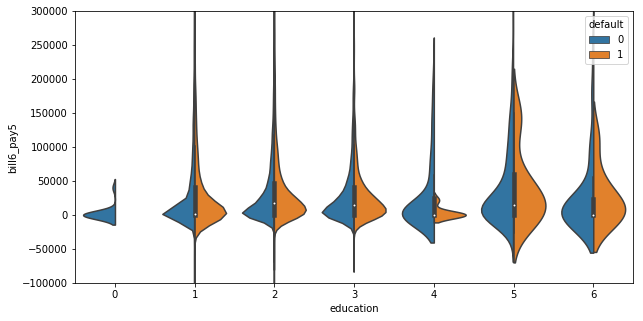

In [31]:
fig,ax = plt.subplots(figsize=(10,5))
sns.violinplot(x='education',y='bill6_pay5',data=data,scale='width',split=True,hue='default',showextrema=False)
ax.set_ylim(-100000,300000)

<div class='alert alert-block alert-warning' style='font-size:150%'>

### 3D plot


</div>

In [28]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'pay_amt5')

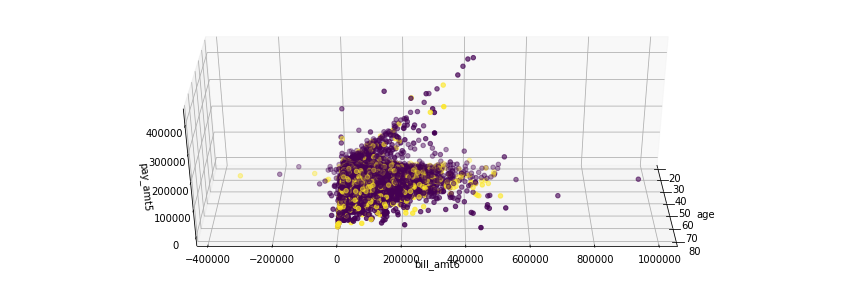

In [56]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data['age'],data['bill_amt6'],data['pay_amt5'],c=data['default'])
ax.view_init(30,0)
ax.set_xlabel('age')
ax.set_ylabel('bill_amt6')
ax.set_zlabel('pay_amt5')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task4

### Try different combination of feature for 3d plot to check for possibility of finding interesting patterns


</div>